## tạo dữ liệu

In [ ]:
from math import cos, sin, pi
from pandas import DataFrame
import numpy as np

theta1 = []
theta2 = []
px = []
py = []

l1 = 40
l2 = 50

for i1 in range (0,80*10):
    for i2 in range (0,170*10):
        t1 = i1/10
        t2 = i2/10
        theta1.append(t1)
        theta2.append(t2)
        px.append(round(l1*cos(t1*pi/180) + l2*cos((t1+t2)*pi/180),2))
        py.append(round(l1*sin(t1*pi/180) + l2*sin((t1+t2)*pi/180),2))
df = DataFrame(np.c_[theta1,theta2,px,py],columns = ['theta1','theta2','px','py'])
export_csv = df.to_csv (r'2axis_robot_small.csv', index = None, header=True)

In [ ]:
from google.colab import files
upload = files.upload()

In [ ]:
import sklearn
import matplotlib.pyplot as plt
from keras.utils import np_utils
import keras
from sklearn.model_selection import train_test_split
import pandas as pd

url = '2axis_robot_small.csv'
data = pd.read_csv(url)

dataX = data.drop(data.columns[:2],axis=1)
X = dataX.values.tolist()

dataY = data.drop(data.columns[2:],axis=1)
Y = dataY.values.tolist()
X_train, X_test, Y_train, Y_test = train_test_split(dataX,dataY,test_size = 0.2,random_state=7)

Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
X_train = np.array(X_train)
X_test = np.array(X_test)


In [ ]:
#tạo mô hình

from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(Dense(256,kernel_initializer='normal', activation='relu',input_shape=(2,)))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(2))
model.summary()
model.compile(loss='mse',optimizer=RMSprop(),metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train,  batch_size=128, epochs=50, verbose=1, validation_split=0.2)
score = model.evaluate(X_test, Y_test, verbose=0)
print('Sai số kiểm tra là : ', score[0])
print('độ chính xác kiểm tra',score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               768       
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 2)                 130       
                                                                 
Total params: 107,842
Trainable params: 107,842
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
6800/6800 [============================

In [ ]:
#lưu lại mô hình 
model.save('ArmRobot.h5')



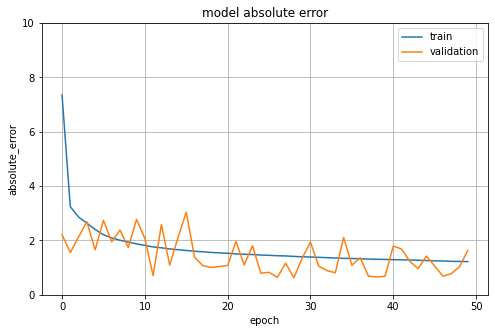

In [ ]:
plt.figure(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,10)

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])

plt.title('model absolute error')
plt.ylabel('absolute_error')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')

plt.show()

In [ ]:
from keras import models
import numpy as np

model200 = models.load_model('ArmRobot.h5')
X_test_new = [[30,30],[29,28]]
X_test_new = np.array(X_test_new)
y_pred = model200.predict(X_test_new)
print(y_pred)

[[ -2.5431309 104.18795  ]
 [ -0.2933172 102.72072  ]]
